In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset (4).csv')


# 2. Do all the necessary pre-processing steps

### Descriptive analysis of dataset

In [3]:
#Check data accuracy using head and tail function
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


There are certian NaN values which we need to look into later.

In [5]:
#Setting PassengerId as index
data=data.set_index('PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
#Checking dimensions
data.shape

(891, 11)

In [7]:
#Checking column names
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Not all features are in numerical form so we need to convert those which we need for the final Model building.

In [9]:
#Checking  statistical summary
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Count is not equal so chances for missing values in some columns which we saw initially.
Requires scaling as range is very different.

In [10]:
#Checking null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Missing values in Age,Cabin and Embarked columns.

In [11]:
#Null values percentage in overall data
data.isnull().sum()/data.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Age column with 19.86% data missing. Cabin column with 77.10% data missing and embarked with .22% data missing.

In [12]:
#Checking for any duplicates
data.duplicated().sum()

0

No duplicates found

## Preprocessing and EDA

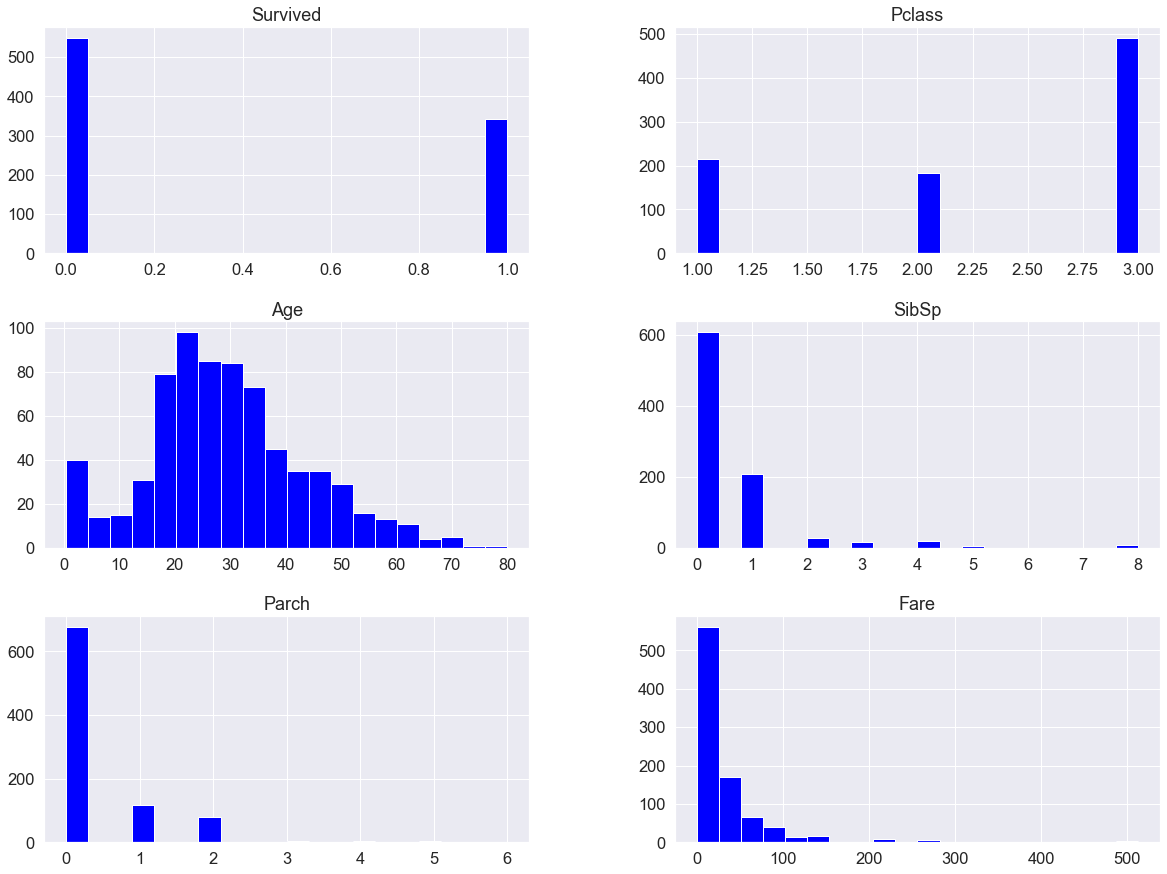

In [13]:
#Checking the distribution of each features
sns.set(style="darkgrid", font_scale=1.5, rc={'figure.figsize':(20,15)})
ax=data.hist(bins=20, color="blue")

#### Filling missing values in Age column

In [14]:
print('Number of null values in age column: ', data['Age'].isnull().sum())

Number of null values in age column:  177


In [15]:

#distribution in age shows right skewness not a normal distribution so we can use median to fill its missing values

data['Age']=data['Age'].fillna(data['Age'].median())
print('Number of null values in age column: ', data['Age'].isnull().sum())

Number of null values in age column:  0


#### Filling missing values in Embarked column

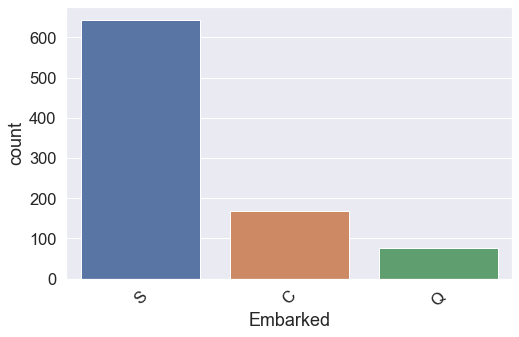

In [16]:
#Visual distribution using countplot.
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=data)
plt.xticks(rotation = 45)
plt.show()

In [17]:
print('Number of null values in Embarked column: ', data['Embarked'].isnull().sum())

Number of null values in Embarked column:  2


In [18]:
#Filling those 2 with mode as S
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
print('Number of null values in Embarked column: ', data['Embarked'].isnull().sum())

Number of null values in Embarked column:  0


#### Missing values in Cabin column

In [19]:
print('Number of null values in Cabin column: ', data['Cabin'].isnull().sum())

Number of null values in Cabin column:  687


In [20]:
#cabin column has many missing values so we can drop that column
data.drop('Cabin',axis=1,inplace=True)
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [21]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data is imbalanced so we need to use stratified kfold to avoid underfitting or overfitting the model due to data imbalance.

In [22]:
#To get unique value counts of all features in a glance
data_un=pd.DataFrame(data.nunique())
data_un

,0
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Embarked,3


Name and Ticket has many unique values so we can use it to understand the dataset first and extract important details if any and then drop them.Sex and Embarked columns can be encoded.

### Outlier Detection 

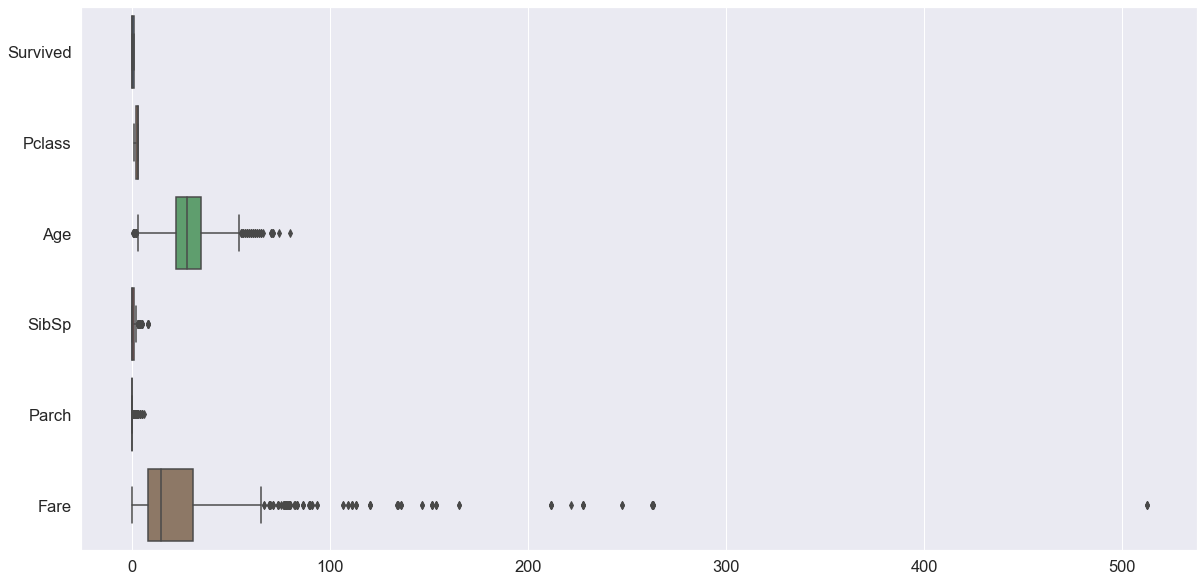

In [23]:
#Using Boxplot to detect outlier presence
plt.figure(figsize=(20,10))
sns.boxplot(data= data, orient='h')
plt.show()

Outliers present in Age,SibSp,Parch and Fare columns which we need to handle.

In [24]:
#Age outliers

#using IQR method to identify those outliers

Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [25]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  13.0
Lower Limit is : 2.5
Upper limit is:  54.5


In [26]:
#Finding those outlier values

outlier_age = []
for i in data['Age']:
    if((i>up_lim) or (i<low_lim)):
        outlier_age.append(i)

In [27]:
#Outlier values in Age
outlier_age

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [28]:
len(outlier_age)

66

In [29]:
#Finding those outlier indexes in upper limit
ind1=data['Age']>up_lim
#data.drop(data.loc[ind1].index,inplace=True)


In [30]:
#Finding those outlier indexes in lower limit
ind2=data['Age']<low_lim
#data.drop(data.loc[ind2].index,inplace=True)

We cant just simply drop Age outliers as Age cannot be an Outlier in this case.

In [31]:
#replotting the box plot again
#plt.boxplot(data['Age'])
#plt.title('Box plot of Age')
#plt.show()

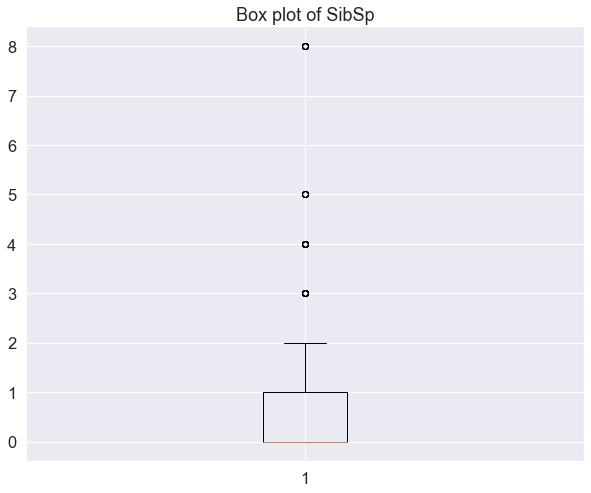

In [32]:
#SibSp Outliers
plt.figure(figsize=(10,8))
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

In [33]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [34]:
IQR_sibsp=Q3-Q1
IQR_sibsp

1.0

In [35]:
lower_sibsp=Q1-1.5*IQR_sibsp
print(lower_sibsp)
upper_sibsp=Q3+1.5*IQR_sibsp
print(upper_sibsp)


-1.5
2.5


In [36]:
#Finding outlier values in SibSp

outliers_sibsp=[]
for i in data['SibSp']:
    if(i>upper_sibsp)or(i<lower_sibsp):
        outliers_sibsp.append(i)

In [37]:
len(outliers_sibsp)

46

In [38]:
#Upper outlier indexes
ind1=data['SibSp']>upper_sibsp
#data.drop(data.loc[ind1].index,inplace=True)

In [39]:
#There are outliers but values in outliers are realistic so not dropping

In [40]:
#replotting the box plot again
#plt.boxplot(data['SibSp'])
#plt.title('Box plot of SibSp')
#plt.show()

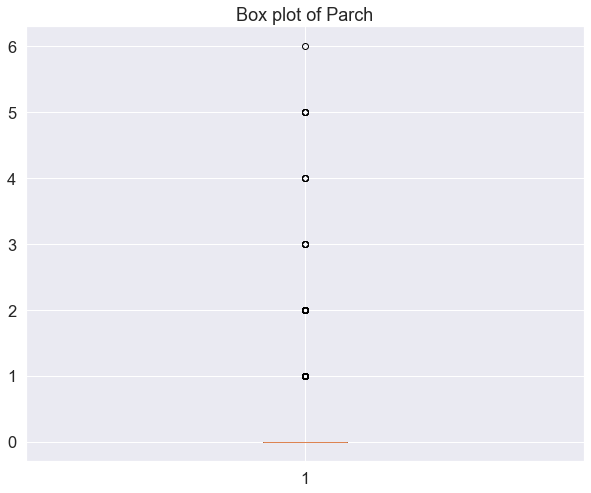

In [41]:
#Parch
plt.figure(figsize=(10,8))
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')
plt.show()

In [42]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [43]:
##There are outliers but values in outliers are realistic so not dropping.No need to handle these outliers

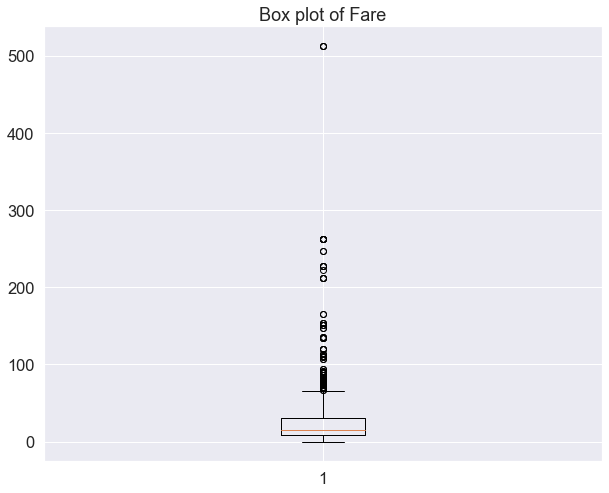

In [44]:
#Fare
plt.figure(figsize=(10,8))
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [45]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [46]:
IQR_fare=Q3-Q1
IQR_fare

23.0896

In [47]:
lower_fare=Q1-1.5*IQR_fare
print(lower_fare)
upper_fare=Q3+1.5*IQR_fare
print(upper_fare)

-26.724
65.6344


In [48]:
#Finding outlier values in Fare

outliers_fare=[]
for i in data['Fare']:
    if(i>upper_fare)or(i<lower_fare):
        outliers_fare.append(i)

In [49]:
len(outliers_fare)

116

In [50]:
#Finding the indexes of those outliers
ind1=data['Fare']>upper_fare
#data.drop(data.loc[ind1].index,inplace=True) 

Fare could be different according to the class they have booked on.So while finding the relation for survival and non Survival with respect to fare,this fare difference can be useful.
So not dropping those.

In [51]:
#Boxplotting to see the image after outlier handling
#plt.boxplot(data['Fare'])

### Visualization in detail 

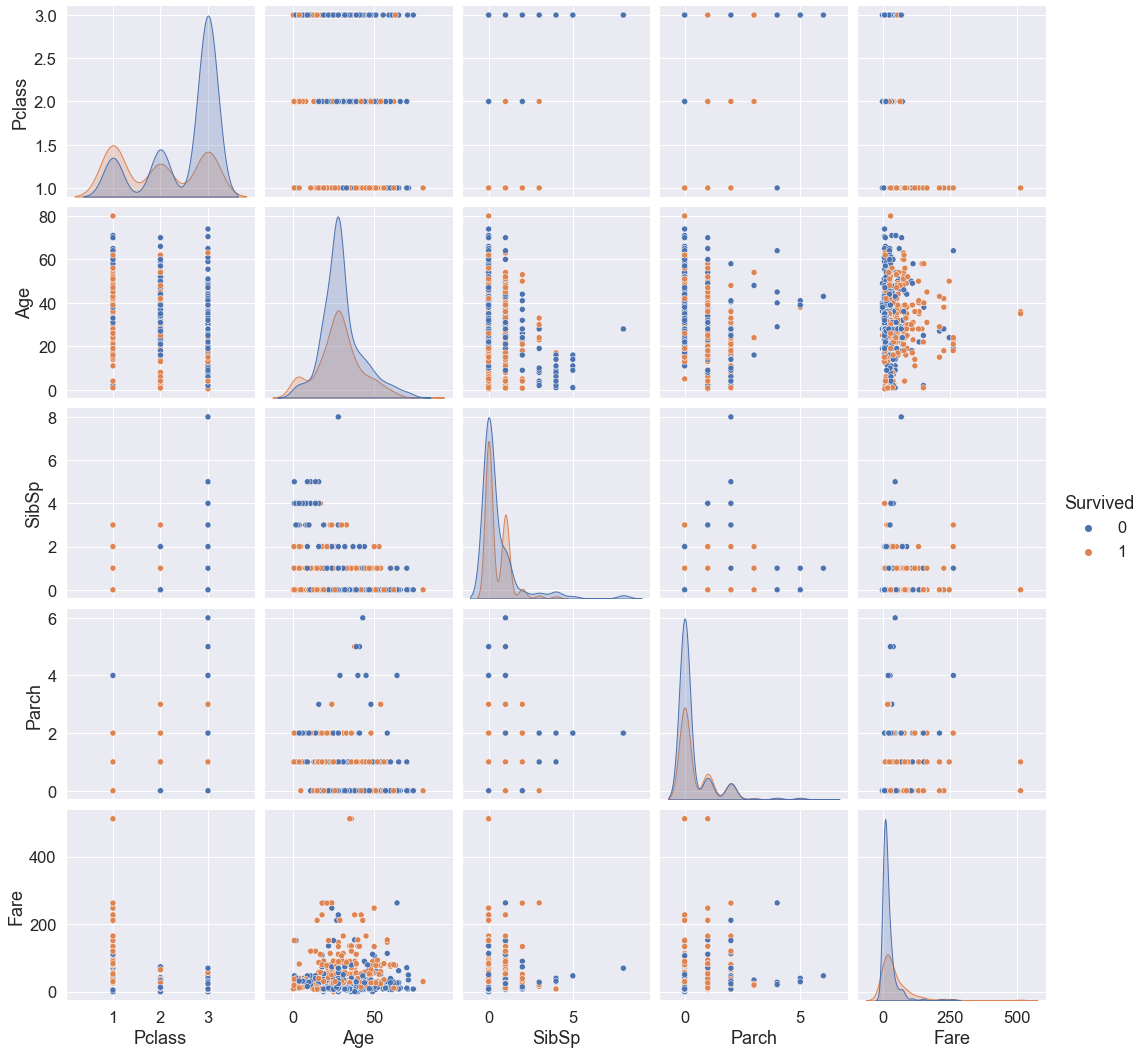

In [52]:
#Pairplot visualization of  given data to find the relationship between variables 
#and it provides a high-level interface for drawing attractive and informative statistical graphics
sns.pairplot(data,hue="Survived", size=3)

<AxesSubplot:>

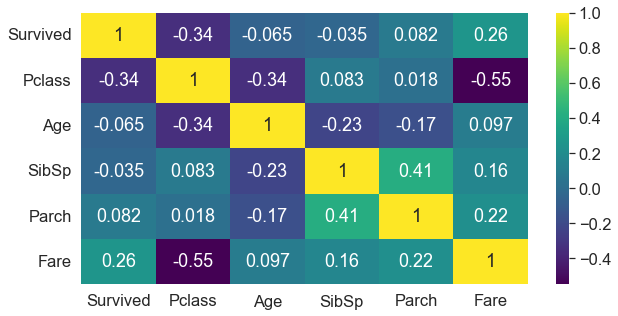

In [53]:
#Heatmap to find correlation
cor=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='viridis')

In [54]:
#Lowest correlation= -0.55(Fare & Pclass)
#Highst correlation= 0.41 (SibSp & Parch)

In [55]:
#correlation of features with target variable(Survived)
data.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

 Pclass has got highest negative correlation with "Survived" followed by Fare, Parch and Age.

<AxesSubplot:xlabel='Survived'>

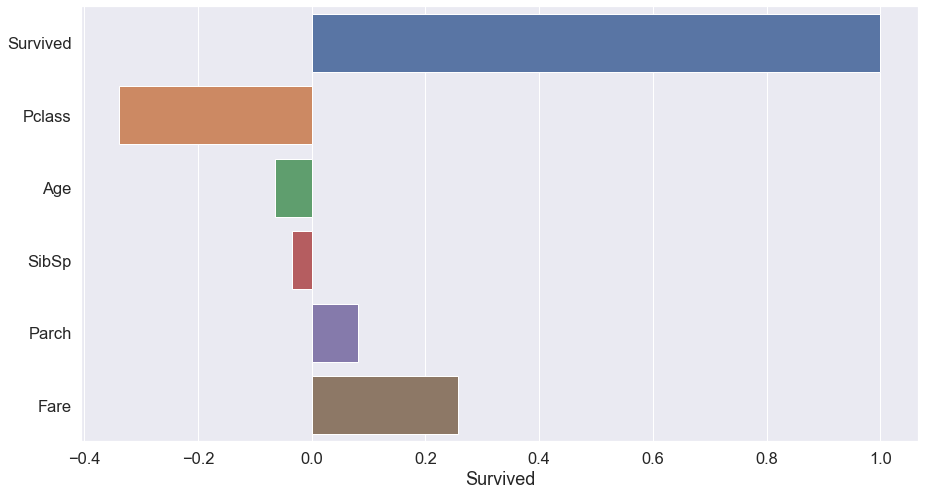

In [56]:
#Visualization
plt.figure(figsize=(15,8))
sns.barplot(x=cor.Survived,y=cor.columns)

0    549
1    342
Name: Survived, dtype: int64


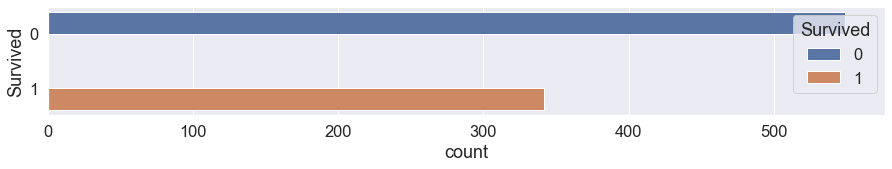

In [57]:
#Visualization of survival rate in whole dataset
fig = plt.figure(figsize=(15,2))
sns.countplot(y='Survived',hue='Survived', data=data);
print(data.Survived.value_counts())

Survival rate is very less.

### Relationship between Features and Survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

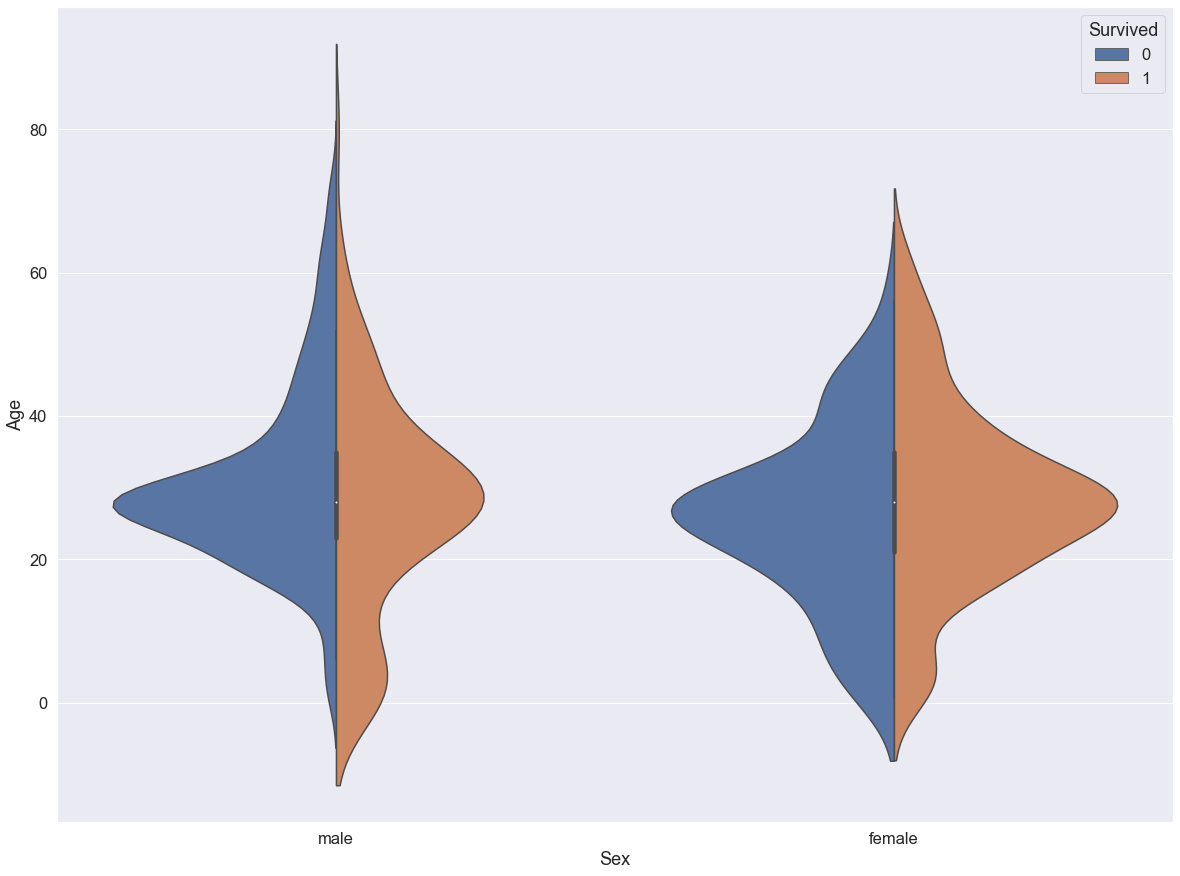

In [58]:

# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = data, split = True)

This gives and idea about age range of men, women and children who were saved.The Survival rate is 
good for children,
high for women in the age range 20-50 and 
less for men as the age increases.

In [59]:
#Pclass vs Survival rate
data.Pclass.value_counts()
data.groupby('Pclass').Survived.value_counts()


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

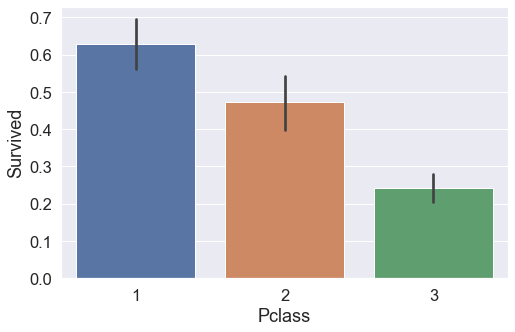

In [60]:
#visualozation
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=data)

Out of 3 classes in Titanic,passengers  who were in Class 1 had better Survival rate.

In [61]:
#Sex vs Survived
data.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

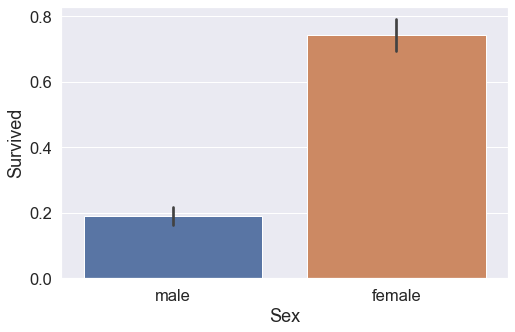

In [62]:
#Visualization
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=data)

Females have better chance in surviving.

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

<Figure size 576x288 with 0 Axes>

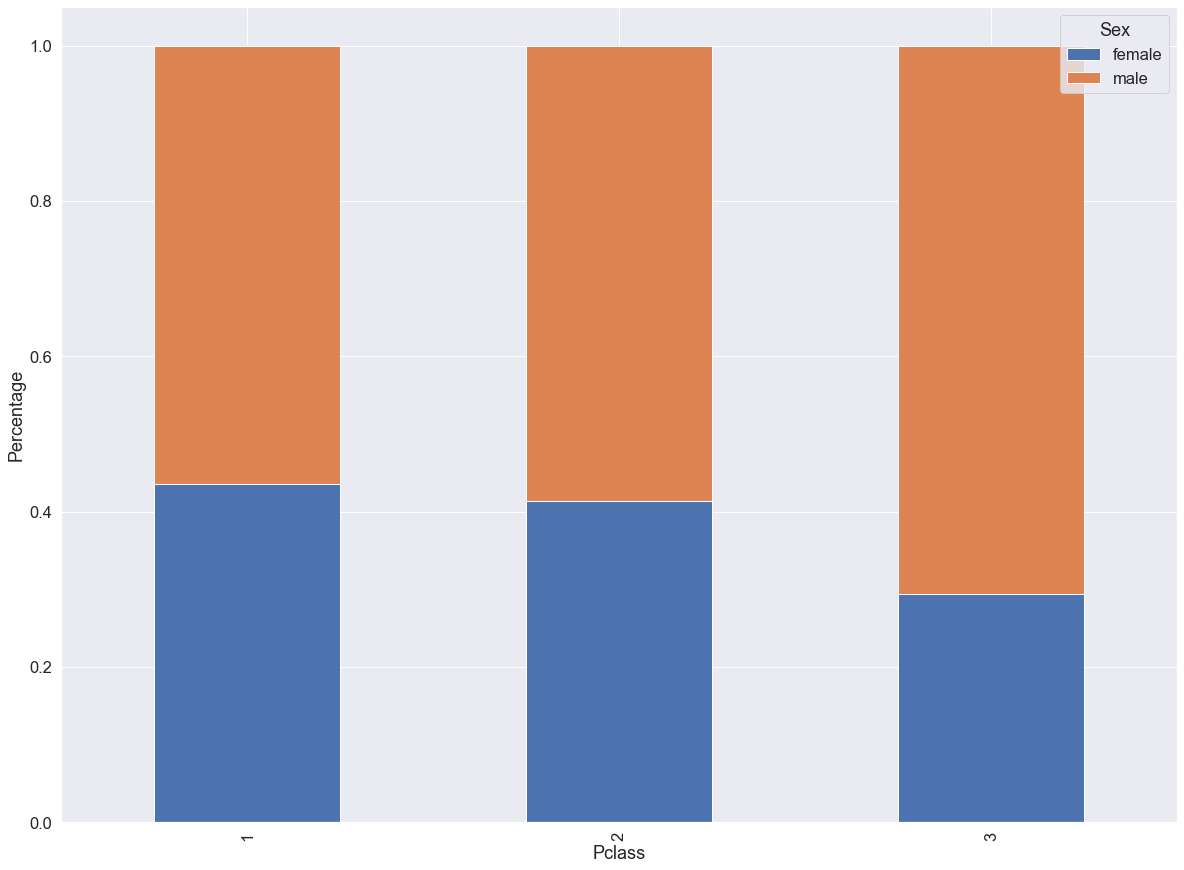

In [63]:
#Finding out how many males and females as per Pclass

sex_class = pd.crosstab(data['Pclass'],data['Sex'])
print (sex_class)

#Visualization
plt.figure(figsize=(8,4))
sex_class.div(sex_class.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

More men were present in Class 3 of Pclass and other 2 had almost same percentage of male and females.

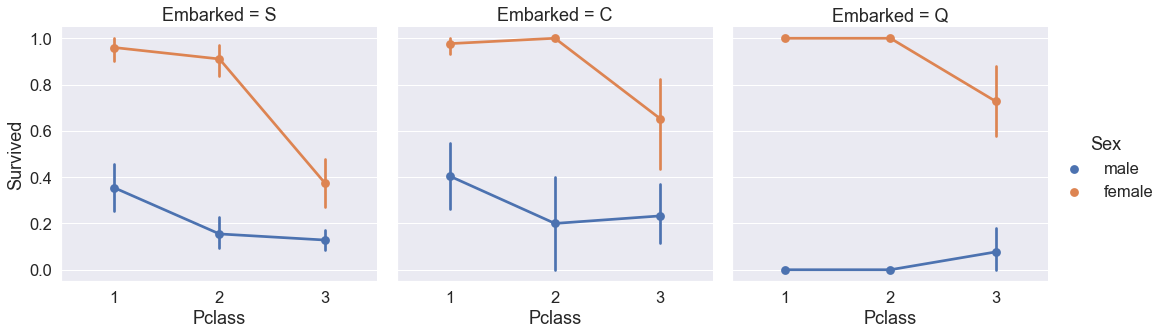

In [64]:
#Visualization of sex with their Pclass and their port of embarkation.
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data)

Females in Pclass 1 and Pclass 2 most of them survived while in Pclass 3 there was a change in it. Most of them had low survival rate in Pclass 3.Men in Pclass 1 had better survival rate.

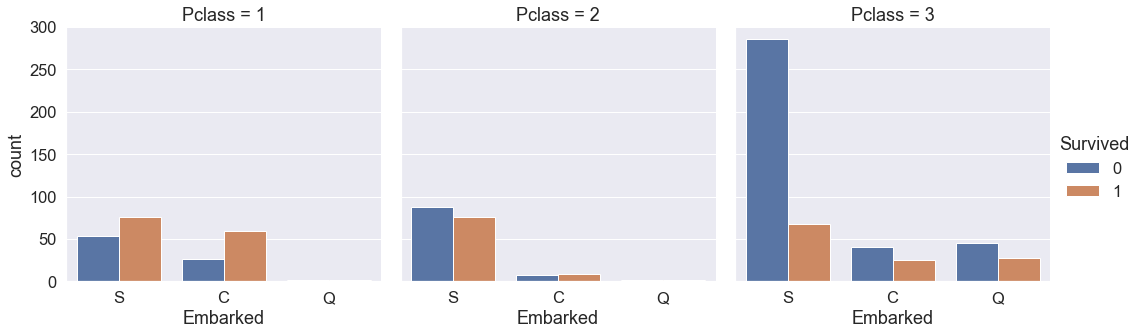

In [65]:

# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = data)

Majority of the passengers boarded from S. 
Majority of class 3 passengers boarded from Q.
S looks lucky for class 1 and 2 passengers compared to class 3.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

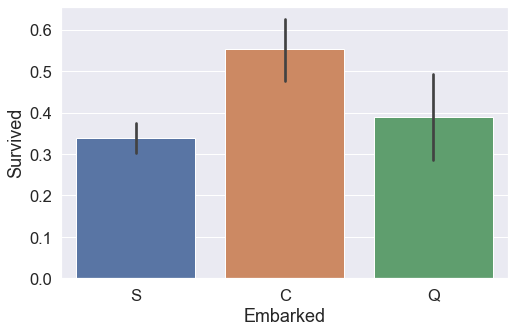

In [66]:
#Embarked vs survived
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked', y='Survived', data=data)

Passengers with Port of Embarkation C had better survival rate.

In [67]:
#Parch by survived grouping
data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

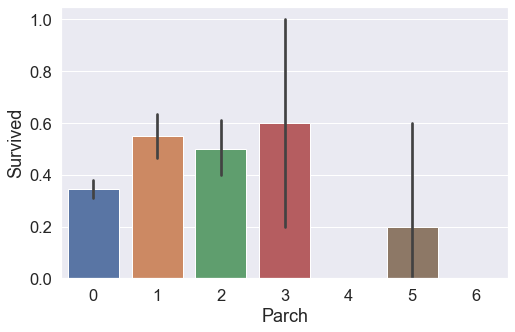

In [68]:
#Visualization
plt.figure(figsize=(8,5))
sns.barplot(x='Parch', y='Survived', data=data) 

Parch(parents and children) as 3 had better survival rate i.e Passengers with family 3 has better survival rate.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

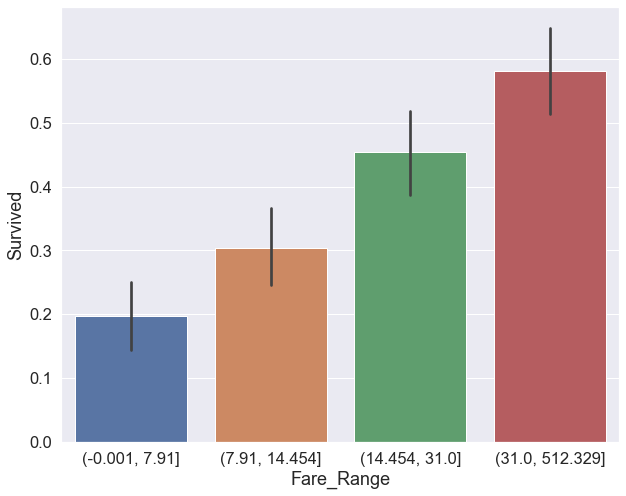

In [69]:
#Fare denotes the fare paid by a passenger. 
#As the values in this column are continuous, they need to be put in separate bins

# Dividing Fare into 4 bins
data['Fare_Range'] = pd.qcut(data['Fare'], 4)

#Visualization
plt.figure(figsize=(10,8))
sns.barplot(x ='Fare_Range', y ='Survived',
data = data)

 It can be concluded that if a passenger paid a higher fare, the survival rate is more.

## Feature Engineering

In [70]:
#Combine SibSp and Parch as family count
data['Family_cnt']=data['SibSp']+data['Parch']
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Range,Family_cnt
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(-0.001, 7.91]",1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(31.0, 512.329]",1


In [71]:
print (data[['Family_cnt', 'Survived']].groupby(['Family_cnt'], as_index=False).mean())

   Family_cnt  Survived
0           0  0.303538
1           1  0.552795
2           2  0.578431
3           3  0.724138
4           4  0.200000
5           5  0.136364
6           6  0.333333
7           7  0.000000
8          10  0.000000


Passengers with 3 family members has more survival chance.Those with more than 7 had no chance at all.Passengers who where alone had 30% chance only.

In [72]:
#In our dataset we have many titles in front of names of passengers in Name column.
#filtering those titles to a new columns name name_title
#data.Name.head(50)

#Splitting the name and title
data['name_title'] = data.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())

#calling out value counts on each
data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

We can see many titles are misspelled and repeated again.So we can replace those to clean the inconsistency.

In [73]:
#Replacing those 
data.loc[(data['name_title']=='Lady')|(data['name_title']=='Countess')|(data['name_title']=='Capt')|(data['name_title']=='Col')|(data['name_title']=='Don')|(data['name_title']=='Dr')|(data['name_title']=='Major')|(data['name_title']=='Rev')|(data['name_title']=='Sir')|(data['name_title']=='Jonkheer')|(data['name_title']=='Dona')|(data['name_title']=='the Countess'),'name_title']='Other'
data['name_title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      23
Mlle        2
Mme         1
Ms          1
Name: name_title, dtype: int64

In [74]:
data.loc[(data['name_title']=='Mlle')|(data['name_title']=='Ms')|(data['name_title']=='Mme'),'name_title']='Miss'  

In [75]:
data[['name_title', 'Survived']].groupby(['name_title'], as_index=False).mean() 

,name_title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Other,0.347826


As we already got to know that females had more survival chance and here we can see that those with tiltle Mrs(married women) survived more,followed by Miss(Girl child/unmarried ones).
Then boy child had better survival chance.Men had very less chance of survival.

In [76]:
#calling out data columns 
data.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Fare_Range', 'Family_cnt', 'name_title'],
      dtype='object')

## Dropping Unnecessary features

In [77]:

#dropping the columns Name and  Ticket as it doesnot contribute to the model
#dropping name_title as we no longer need that info for model building
data.drop(['Name','name_title','Ticket'],axis=1,inplace=True)

#Dropping SibSp and Parch columns as we formed a new columns Family_cnt out of it.And aslo Fare_Range.
data.drop(['SibSp','Parch','Fare_Range'],axis=1,inplace=True)
data.head(2)

#In single step
#data.drop(['Name','name_title','Ticket','SibSp','Parch'],axis=1,inplace=True)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1


### Encoding

In [78]:

data['Sex'].nunique()

2

In [79]:
data['Embarked'].nunique()

3

In [80]:
#Label encoding sex and embarked columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data.head(2)


,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,2,1
2,1,1,0,38.0,71.2833,0,1


## Scaling


As we have already seen that the distribution and range of values in features need scaling to be done.

In [81]:
#importing Standard scaler

from sklearn.preprocessing import StandardScaler

#create an instance

scaler=StandardScaler()


In [82]:
#taking only numerical columns that are not encoded
num_cols=['Pclass', 'Age', 'Family_cnt','Fare']
data[num_cols]=scaler.fit_transform(data[num_cols])

In [83]:
data.describe().round(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,-0.00,0.65,0.00,-0.00,1.54,0.00
std,0.49,1.00,0.48,1.00,1.00,0.79,1.00
min,0.00,-1.57,0.00,-2.22,-0.65,0.00,-0.56
25%,0.00,-0.37,0.00,-0.57,-0.49,1.00,-0.56
50%,0.00,0.83,1.00,-0.10,-0.36,2.00,-0.56
75%,1.00,0.83,1.00,0.43,-0.02,2.00,0.06
max,1.00,0.83,1.00,3.89,9.67,2.00,5.64


# 3. Create kNN and SVM models


## Modelling

In [84]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [85]:
X.head(2)

,Pclass,Sex,Age,Fare,Embarked,Family_cnt
PassengerId,,,,,,
1,0.827377,1,-0.565736,-0.502445,2,0.05916
2,-1.566107,0,0.663861,0.786845,0,0.05916


In [86]:
#Hold out Cross Validation
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## KNearest Neighbors Classifier Model

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [89]:
#Finding the best K value for kNN 

metric_k=[]  
neighbors=range(3,18,2)  

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,pred_kNN) 
    metric_k.append(acc) 

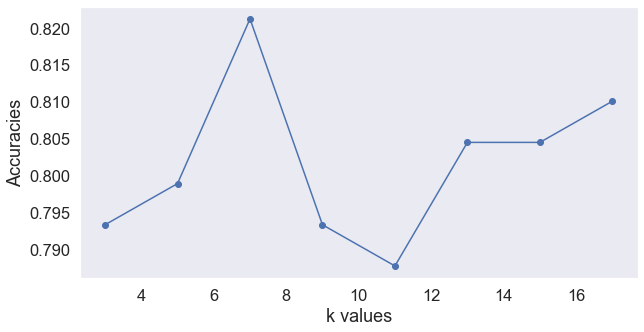

In [90]:
#we can plot it to find the  k value that gives best accuracy 

plt.figure(figsize=(10,5))
plt.plot(neighbors,metric_k,'o-')  
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid() 

In [91]:

#Lets take k as 7 here as it gives high accuracy here

#Creating an instance
knn=KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)

#Prediction
y_pred_knn=knn.predict(X_test)

### Evaluation

In [92]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Text(0.5, 7.5, 'Predicted label')

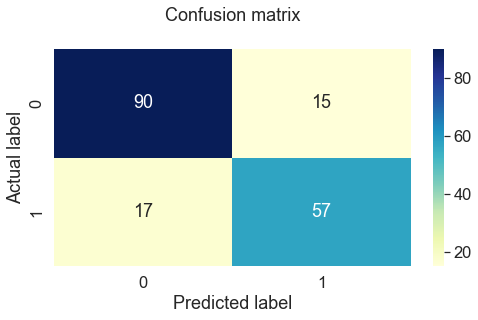

In [93]:
#Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
#Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
cnf_matrix

array([[90, 15],
       [17, 57]], dtype=int64)

In [95]:
print("Precision :",precision_score(y_test,y_pred_knn,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_knn,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_knn,average = 'weighted'))
print('The accuracy of KNN is',accuracy_score(y_test,y_pred_knn))

Precision : 0.820676482361336
Recall : 0.8212290502793296
F1 Score : 0.8208478509163946
The accuracy of KNN is 0.8212290502793296


In [96]:
acc_knn=accuracy_score(y_test,y_pred_knn)

## Support Vector Machine Model

### SVM using kernel as Linear

In [97]:
#Import necessary libraries
from sklearn import svm 
from sklearn.svm import SVC

In [98]:
#Creating an instance
svm_linear=SVC(kernel='linear')

#Fitting the model
svm_linear.fit(X_train,y_train)

#Predicting
y_pred_svm1=svm_linear.predict(X_test)

### Evaluation

In [99]:
print(classification_report(y_test, y_pred_svm1))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Text(0.5, 7.5, 'Predicted label')

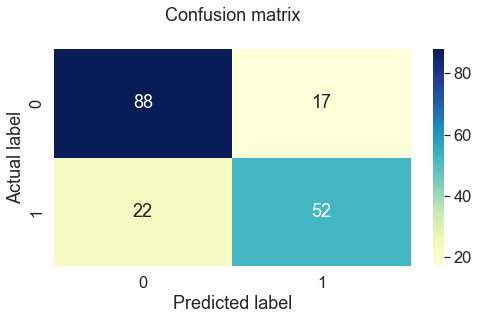

In [100]:
#Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm1)
plt.figure(figsize=(8,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [101]:
print("Precision :",precision_score(y_test,y_pred_svm1,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_svm1,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_svm1,average = 'weighted'))
print('The accuracy of Support vector machine using linear kernal is',accuracy_score(y_test,y_pred_svm1))

Precision : 0.7808274633632905
Recall : 0.7821229050279329
F1 Score : 0.7808473194987422
The accuracy of Support vector machine using linear kernal is 0.7821229050279329


In [102]:
acc_svm1=accuracy_score(y_test,y_pred_svm1)

### SVM using kernal as RBF

In [103]:
#creating an instance
svm_rbf=SVC(kernel='rbf')

#Fitting the model
svm_rbf.fit(X_train,y_train)

#Prediction
y_pred_svm2=svm_rbf.predict(X_test)

### Evaluation

In [104]:
print(classification_report(y_test, y_pred_svm2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Text(0.5, 7.5, 'Predicted label')

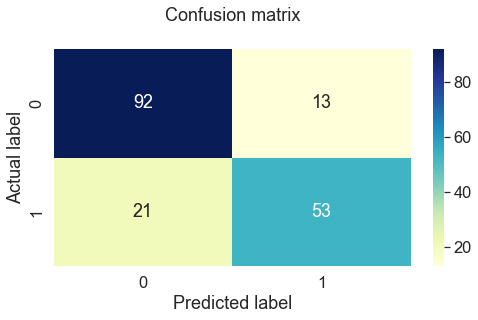

In [105]:
#Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm2)
plt.figure(figsize=(8,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [106]:
print("Precision :",precision_score(y_test,y_pred_svm2,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_svm2,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_svm2,average = 'weighted'))
print('The accuracy of SVM rbf is',accuracy_score(y_test,y_pred_svm2))

Precision : 0.8095584809383198
Recall : 0.8100558659217877
F1 Score : 0.8081141041317352
The accuracy of SVM rbf is 0.8100558659217877


In [107]:
acc_svm2=accuracy_score(y_test,y_pred_svm2)

# 4. Do k-fold and  stratified k-fold cross validation techniques and find the average accuracy score of the models.



## K-Fold Cross validataion

In [108]:
from sklearn.model_selection import KFold

In [109]:
kfold_val=KFold(10)  #k as 10

In [110]:
#which all indexes it has taken to create the subset

for train_index,test_index in kfold_val.split(X,y):
    print('Training index :',train_index)
    print('Test index:',test_index)

Training index : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [111]:
#import necessary library

from sklearn.model_selection import cross_val_score

### KNN

In [112]:
#For KNN model
cv_result_knn=cross_val_score(knn,X,y,cv=kfold_val)
cv_result_knn

array([0.77777778, 0.82022472, 0.76404494, 0.76404494, 0.83146067,
       0.79775281, 0.85393258, 0.74157303, 0.84269663, 0.76404494])

In [113]:
#calculate the average score from these
np.mean(cv_result_knn)

0.7957553058676654

In [114]:
#Storing to a variable name
kfold_knn=np.mean(cv_result_knn)
print('The K-fold cross validation score of KNN model is ',kfold_knn)

The K-fold cross validation score of KNN model is  0.7957553058676654


### SVM

In [115]:
#SVM with linear kernel
cv_result_svm1=cross_val_score(svm_linear,X,y,cv=kfold_val)
cv_result_svm1

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [116]:
#calculate the average score from these
np.mean(cv_result_svm1)

0.786729088639201

In [117]:
kfold_svm1=np.mean(cv_result_svm1)
print('The K-fold cross validation score of SVM linear is ',kfold_svm1)

The K-fold cross validation score of SVM linear is  0.786729088639201


In [118]:
#SVM with RBF kernel
cv_result_svm2=cross_val_score(svm_rbf,X,y,cv=kfold_val)
cv_result_svm2

array([0.8       , 0.85393258, 0.79775281, 0.85393258, 0.79775281,
       0.79775281, 0.79775281, 0.78651685, 0.88764045, 0.85393258])

In [119]:
np.mean(cv_result_svm2)

0.8226966292134831

In [120]:
kfold_svm2=np.mean(cv_result_svm2)
print('The K-fold cross validation score of SVM rbf is ',kfold_svm2)

The K-fold cross validation score of SVM rbf is  0.8226966292134831


## Stratified K-Fold Cross Validation

In [121]:
from sklearn.model_selection import StratifiedKFold

In [122]:
skfold_val=StratifiedKFold(n_splits=10)

In [123]:
#which all indexes it has taken to create the subset

for train_index,test_index in skfold_val.split(X,y):
    print('Training index :',train_index)
    print('Test index:',test_index)

Training index : [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

### KNN

In [124]:
skcv_result_knn=cross_val_score(knn,X,y,cv=skfold_val)
print(skcv_result_knn)

[0.78888889 0.82022472 0.74157303 0.78651685 0.85393258 0.79775281
 0.87640449 0.75280899 0.80898876 0.7752809 ]


In [125]:
np.mean(skcv_result_knn)

0.8002372034956305

In [126]:
strat_knn=np.mean(skcv_result_knn)
print('The stratified K-Fold score for KNN is ',strat_knn)

The stratified K-Fold score for KNN is  0.8002372034956305


### SVM

In [127]:
skfold_val_svm=StratifiedKFold(n_splits=10)

In [128]:
skcv_result_svm1=cross_val_score(svm_linear,X,y,cv=skfold_val_svm)
print(skcv_result_svm1)

[0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]


In [129]:
np.mean(skcv_result_svm1)

0.786729088639201

In [130]:
strat_svm1=np.mean(skcv_result_svm1)
print('The stratified K-Fold score for Linear SVM is ',strat_svm1)

The stratified K-Fold score for Linear SVM is  0.786729088639201


In [131]:
skcv_result_svm2=cross_val_score(svm_rbf,X,y,cv=skfold_val_svm)
print(skcv_result_svm2)

[0.81111111 0.83146067 0.76404494 0.88764045 0.82022472 0.78651685
 0.82022472 0.79775281 0.85393258 0.84269663]


In [132]:
np.mean(skcv_result_svm2)

0.8215605493133582

In [133]:
strat_svm2=np.mean(skcv_result_svm2)
print('The stratified K-Fold score for RBF SVM is ',strat_svm2)

The stratified K-Fold score for RBF SVM is  0.8215605493133582


## Comparison of 2 models Accuracy and Cross validation results

## KNN

In [134]:
#Hold-Out method
print('The accuracy of KNN is',accuracy_score(y_test,y_pred_knn))

#K-Fold cross Validation
print('The mean score of kfold cross validation for KNN is ',np.mean(cv_result_knn))

#Stratified K-Fold Cross Validation
print('The mean score of Stratified K-Fold for KNN is ',np.mean(skcv_result_knn))


The accuracy of KNN is 0.8212290502793296
The mean score of kfold cross validation for KNN is  0.7957553058676654
The mean score of Stratified K-Fold for KNN is  0.8002372034956305


## SVM

In [135]:
#Hold-Out method
print('The accuracy of Support vector machine using linear kernal is',accuracy_score(y_test,y_pred_svm1))
print('The accuracy of SVM rbf is',accuracy_score(y_test,y_pred_svm2))

#K-Fold Cross validation
print('The mean score of kfold cross validation for SVM using linear kernel  is ',np.mean(cv_result_svm1))
print('The mean score of kfold cross validation for SVM using rbf kernel  is ',np.mean(cv_result_svm2))

#Stratified K-Fold Cross Validation
print('The mean score of stratified K-fold cross validation for SVM using rbf kernel  is ',np.mean(skcv_result_svm1))
print('The mean score of stratified K-fold cross validation for SVM using rbf rbf  is ',np.mean(skcv_result_svm2))

The accuracy of Support vector machine using linear kernal is 0.7821229050279329
The accuracy of SVM rbf is 0.8100558659217877
The mean score of kfold cross validation for SVM using linear kernel  is  0.786729088639201
The mean score of kfold cross validation for SVM using rbf kernel  is  0.8226966292134831
The mean score of stratified K-fold cross validation for SVM using rbf kernel  is  0.786729088639201
The mean score of stratified K-fold cross validation for SVM using rbf rbf  is  0.8215605493133582


In [136]:
#Making it into a DataFrame for better view
models = pd.DataFrame({
    'Model': ['KNN', 'SVM(Linear)','SVM(RBF)'],
    
    'Hold-Out Score': [acc_knn, acc_svm1, acc_svm2],
              'K-Fold':[kfold_knn,kfold_svm1,kfold_svm2],
              'Stratified':[strat_knn,strat_svm1,strat_svm2]
    })


models

,Model,Hold-Out Score,K-Fold,Stratified
0,KNN,0.821229,0.795755,0.800237
1,SVM(Linear),0.782123,0.786729,0.786729
2,SVM(RBF),0.810056,0.822697,0.821561


As a final conclusion we can see that Support Vector machine with RBF as kernal gives a better model performance than KNN.